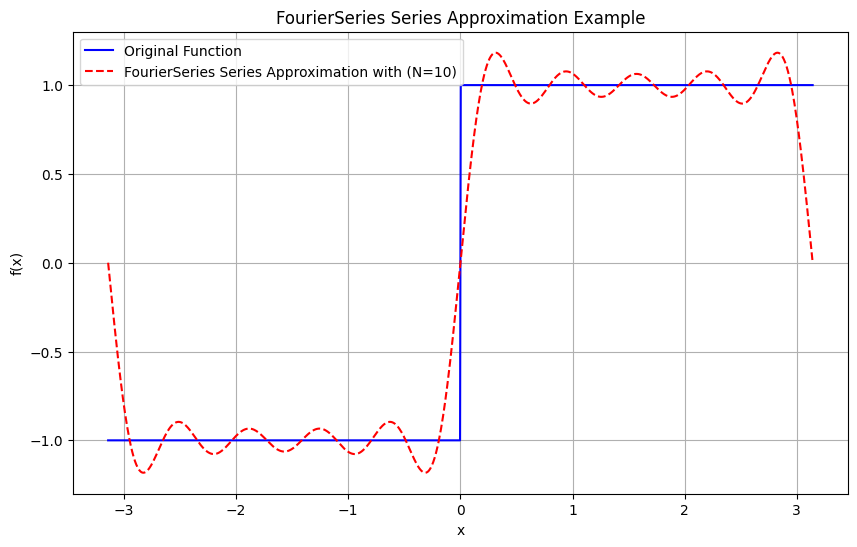

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class FourierSeries:
    def __init__(self,func,L,terms=10):
        self.func=func
        self.L=L
        self.terms=terms
        
    def calculate_a0(self,N=1000):
        x=np.linspace(-self.L,self.L,N)
        y=self.func(x)
        return np.trapezoid(y,x)/(2*self.L)
    
    def calculate_an(self,n,N=1000):
        x=np.linspace(-self.L,self.L,N)
        y=self.func(x)*np.cos(n*np.pi*x/self.L)
        return np.trapezoid(y,x)/self.L
    
    def calculate_bn(self,n,N=1000):
        x=np.linspace(-self.L,self.L,N)
        y=self.func(x)*np.sin(n*np.pi*x/self.L)
        return np.trapezoid(y,x)/self.L
        
        
    def approxiamte(self,x):
        a0=self.calculate_a0()
        approximation = a0/2
        for n in range(1,self.terms+1):
            an=self.calculate_an(n)
            bn=self.calculate_bn(n)
            approximation+=an*np.cos(n*np.pi*x/self.L)+bn*np.sin(n*np.pi*x/self.L)
        return approximation
    
    def plot(self):
        x=np.linspace(-self.L,self.L,1000)
        original=self.func(x)
        approxiamtion=self.approxiamte(x)
        plt.figure(figsize=(10,6))
        plt.plot(x,original,label='Original Function',color="blue")
        plt.plot(x,approxiamtion,label=f'FourierSeries Series Approximation with (N={n})',linestyle='--', color="red")
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('FourierSeries Series Approximation Example')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        
        
def target_function(x,function_type="square"):
        if function_type=="square":
            return np.sign(np.sin(x))
        elif function_type=="sawtooth":
            return (x/np.pi)%2-1
        elif function_type=="triangle":
            return 2*np.abs(2*(x/np.pi-np.floor(x/np.pi+0.5)))-1
        elif function_type=="sine":
            return np.sin(x)
        elif function_type=="cosine":
            return np.cos(x)
        else:
            raise ValueError("Function type not found")
        
    
if __name__=='__main__':
        L=np.pi
        n=10
        fs=FourierSeries(lambda x:target_function(x,function_type="square"),L,n)
        fs.plot()
        
    
        